神经网络的学习：从训练数据中自动获取最优权重参数的过程。

倒入损失函数这一指标，学习的目的就是以这个指标为基准，找出能使他的值达到最小的权重参数。

为了找出近可能小的损失函数的值，将利用函数斜率的梯度法。

神经网络的特征：可以从数据中学习，由数据自动决定权重参数的值。

数据是机器学习的核心，数据驱动机器学习的执行过程。

训练数据（监督数据）和测试数据
原因是：
    1、模型的泛化能力：指模型在未见过的数据上的表现能力。获得泛化能力是机器学习的最终目标
    2、模型的过拟合：指模型在训练数据上表现很好，但是在未见过的数据上表现很差的情况。避免过拟合也是机器学习的重要课题。
    3、模型的欠拟合：指模型在训练数据上表现很差的情况。

1、使用训练数据进行学习，寻找最优权重参数。

2、使用测试数据评价训练得到模型的实际能力，评价指标是损失函数的值。

3、评价指标：

 损失函数：表示神经网络性能的“恶劣程度”，即当前的神经网络权重参数对于真实值的“距离”。
         
         即当前神经网络对监督数据在多大程度上的不拟合，多大程度上不一致，
         
         损失函数的值越小，说明当前神经网络对监督数据的拟合程度越好。

    1）均方误差：是指神经网络输出的结果与监督数据的差的平方的总和的平均值。
    2）交叉熵误差：是指神经网络输出的结果与监督数据的差的总和的平均值。
 均方误差和交叉熵误差都是损失函数，均方误差适用于连续数值的输出，交叉熵误差适用于离散的类别型数据。   

均方误差公式：
$$
E = \frac{1}{2}\sum_k(y_k - t_k)^2
$$

- 除以2的变体 ：
这样做的目的是使梯度计算时消除常数2，简化求导过程
- 实际应用中的选择 ：

- 两种方法在本质上没有区别，只是常数因子的差异
- 大多数深度学习框架默认使用标准公式（除以n）
- 如果您看到除以2的实现，通常是出于数学推导的便利

yk表示神经网络的输出，tk表示监督数据，k表示数据的维度


在数学计算中按道理均方误差公式为：
$$
E = \frac{1}{n}\sum_k(y_k - t_k)^2
$$

n为数据的个数
标准MSE公式

y=[0.1,0.05,0.6,0.0,0.05,0.1,0.1,0.1,0.0,0.0]

t=[0,0,1,0,0,0,0,0,0,0]   #one-hot表示
 
 数组元素的索引从第一个开始对应数字0，1，2....9，这里神经网络的输出y是softmax函数的输
 出，其中的数值可以理解为概率。t是监督数据，是正确解标签对应的数组，正确解标签是2，所以t
 [2]是1，其他都是0。



![image.png](learn-images/mse.png)

In [5]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

#设2为正确解
t=[0,0,1,0,0,0,0,0,0,0]   #one-hot表示

#例1:“2”的概率最高的情况（0.6）
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

#例2:“2”的概率的情况（0.1）
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))


0.09750000000000003
0.5975


以上代码举了2个例子，第一个例子中，正确解是“2”，神经网络的输出最大值是“2”；

第二个例子中，正确解是“2”，神经网络的输出最大值是“7”。

发现第一个例子的损失函数值更小，和监督数据之间的误差更小，也就是说第一个例子的输出结果和监督数据更加吻合。

交叉熵误差公式：
$$
E = - \sum_k t_k \log y_k
$$
yk 是神经网络的输出，tk是正确解标签，k是数据维度。并且tk只有正确解标签索引为1，其他均为0（one-hot表示）

实际上只计算对应正确解标签的输出的自然对数，如假设正确解标签索引为2，与之对应的神经网络输出是0.6，则交叉熵误差为
$$
E = - \log 0.6 = 0.51
$$

正确解标签索引为2，对应的神经网络输出是0.1，则交叉熵误差为
$$
E = - \log 0.1 = 2.3
$$

也就是说，交叉熵误差的值由正确标签对应的输出结果决定。



In [6]:
def cross_entropy_error(y,t):
    delta=1e-7 # 一个微小值，防止出现log0的情况导致负无限大
    return -np.sum(t*np.log(y+delta))

#设2为正确解
t=[0,0,1,0,0,0,0,0,0,0]   #one-hot表示

#例1:“2”为正解标签对应输出（0.6）
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

#例2:“2”为正解标签对应输出 (0.1)
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


mini-batch学习

机器学习使用训练数据进行学习。也就是说针对训练数据计算损失函数的值，找出使该值尽可能小的参数。因此，计算损失函数必须将所有训练数据作为对象，就是说，训练数据有100个的话，要把这100个损失函数的总和作为学习的目标。

前面介绍的例子是针对单个数据的损失函数。如果要求所有训练数据的损失函数的总和作为学习的目标，该如何进行呢？

比如，有10000个训练数据，从10000个数据中随机选择100个数据，这100个数据称为mini-batch，mini-batch的损失函数就被作为学习的目标。

以交叉熵误差为例，mini-batch的损失函数如下式所示：
    $$
    E = - \frac{1}{N} \sum_{n \in N} \sum_{k \in K} t_k^{(n)} \log y_k^{(n)}
    $$

假设mini-batch 一次性计算3张图片，3张图片经过神经网络的输出为（3个分类）：
y1=[0.1,0.5,0.4]
y2=[0.3,0.1,0.6]
y3=[0.2,0.7,0.1]

#完全正解
y1=[0.1,0.4,0.5]
y2=[0.3,0.6,0.1]
y3=[0.2,0.1,0.7]    

假设mini-batch的正确解标签为：
t1=[0,0,1]
t2=[0,1,0]
t3=[0,0,1]




- 批量计算步骤 （针对3张图片）：

    -  对每张图片计算交叉熵 -单个样本的交叉熵公式进行计算
    -  对所有图片的交叉熵求平均

具体计算过程 ：

第一张图片(y1, t1) ：
L1 = -(0 log(0.1) + 0 log(0.5) + 1*log(0.5)) = -log(0.5) ≈ 0.916

第二张图片(y2, t2) ：
L2 = -(0 log(0.3) + 1 log(0.1) + 0*log(0.6)) = -log(0.1) ≈ 2.303

第三张图片(y3, t3) ：
L3 = -(0 log(0.2) + 0 log(0.7) + 1*log(0.1)) = -log(0.6) ≈ 2.303

Calculate the average cross-entropy loss:
(0.916 + 2.303 + 2.303) / 3 ≈ 1.841



把单个数据的损失函数扩大到了N份，最后还要除以N进行正规化，求单个数据的“平均损失函数”，可以获得和训练数据数量无关的统一指标。

if y.ndim == 1:
        
        t = t.reshape(1, t.size)
        
        y = y.reshape(1, y.size)
        
这段代码的主要目的是处理神经网络输入数据的维度问题，具体原因如下：

1. 统一维度处理 ：
   
   - 当输入y是1维数组时（单个样本），通过reshape(1, y.size)将其转换为2维数组（批量大小为1）
   - 这样可以保持批量处理的一致性，无论输入是单个样本还是批量样本都能统一处理
2. 数学运算兼容性 ：
   
   - 神经网络中的矩阵运算通常要求输入是2维的（batch_size × feature_size）
   - 这种转换确保后续的矩阵乘法、激活函数等运算能够正确执行
3. 与监督数据对齐 ：
   
   - 同时对监督数据t进行相同维度的转换
   - 确保预测值y和监督数据t的维度匹配，便于计算损失函数
4. 实际应用场景 ：
   
   - 在训练神经网络时，通常需要同时处理单个样本和批量样本
   - 这种写法使得函数既能处理单个样本输入，也能处理批量样本输入
   - 例如：
     - 单个样本：y.shape = (10,) → (1, 10)
     - 批量样本：y.shape = (100, 10) 保持不变

In [25]:
#监督数据形式为one-hot
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

t=np.array([[0,0,1],[0,1,0],[0,0,1]])

y1=np.array([[0.1,0.5,0.4],[0.3,0.1,0.6],[0.2,0.7,0.1]])
y2=np.array([[0.5,0.1,0.4],[0.3,0.6,0.1],[0.2,0.1,0.7]])

print(cross_entropy_error(y1,t))
print(cross_entropy_error(y2,t))




1.8404862226210927
0.5945969133517081


np.log(y[np.arange(batch_size), t]) 这行代码使用了NumPy的高级索引技术，其工作原理如下：
抽出各个数据的正确解标签对应的神经网络的输出

1. 索引结构 ：
   
   - np.arange(batch_size) 生成一个从0到batch_size-1的数组，如[0,1,2,...,batch_size-1]
   - t 是包含每个样本正确类别索引的数组
2. 索引过程 ：
   
   - 假设 batch_size=3 , t=[2,1,0]
   - y[np.arange(3), [2,1,0]] 相当于同时执行：
     - y[0,2] (第一个样本的第3个类别概率)
     - y[1,1] (第二个样本的第2个类别概率)
     - y[2,0] (第三个样本的第1个类别概率)
3. 数学意义 ：
   
   - 这实现了对每个样本取其正确类别对应的预测概率
   - 然后对这些概率值取对数，用于交叉熵计算

In [40]:
import numpy as np

# 假设有3个样本，每个样本有3个类别的预测概率
y = np.array([
    [0.1, 0.2, 0.7],  # 样本1
    [0.3, 0.4, 0.3],  # 样本2
    [0.5, 0.1, 0.4]   # 样本3
])

# 每个样本的正确类别索引
t = np.array([2, 1, 0])  # 样本1的正确类别是2，样本2是1，样本3是0

# 高级索引操作
selected_probs = y[np.arange(3), t]  # 结果为 [0.7, 0.4, 0.5]
log_probs = np.log(selected_probs)  # 对正确类别的概率取对数

print("Selected probabilities:", selected_probs)
print("Log probabilities:", log_probs)

Selected probabilities: [0.7 0.4 0.5]
Log probabilities: [-0.35667494 -0.91629073 -0.69314718]


In [ ]:
#监督数据为标签形式
#由标签索引确定监督数据
import numpy as np
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    
    #print(y[np.arange(batch_size), t])
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
#假设batch_size为3,输出3个类别的数据标签为[2,7,9]
t=np.array([0,1,2])  #标签索引

y1=np.array([[0.1,0.5,0.4],[0.3,0.1,0.6],[0.2,0.7,0.1]])  #取0.1  0.1 0.1
y2=np.array([[0.5,0.1,0.4],[0.3,0.6,0.1],[0.2,0.1,0.7]])  #取0.5 0.6 0.7

y=[y1,y2]
for i in range(len(y)):
    print(cross_entropy_error(y[i],t))
     
    

2.302584092994546
0.5202157462469678


倒入损失函数的目的：在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数，这就需要寻找参数的导数（确切的讲是梯度），然后以这个导数为指引，逐步更新参数的值。

在神经网络的学习时，不能将识别精度做指标，因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0.

识别精度对微小的参数变化基本上没什么反应，即使有反应，它的值也是不连续的，突然的变化，而如果把损失函数作为指标，稍微改变一下参数的值，对应的损失函数会发生微小的，连续性的变化。

sigmoid函数不仅函数输出值是连续变化的，曲线的斜率（导数）也是连续变化的，也就是说，sigmoid函数的导数在任何地方都不为0.这对神经网络的学习非常重要。得益于斜率不为0 的性质，神经网络的学习得以正确的进行。

数值微分

梯度法使用梯度的信息决定前进的方向

1、导数

导数：函数f(x)在x点的导数表示为f'(x)，导数是函数f(x)在x点的变化率，导数的定义如下：
x的微小变化将导致函数f(x)的值在多大程度上的变化，其中，h表示微小变化的距离，h无限趋近于0.

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$  

In [ ]:
#不好的实现实例
def numerical_diff(f,x):  #数值微分英文：numerical differentiation
    h=10e-50
    return (f(x+h)-f(x))/h


以上代码有2处需要改进的地方

1、因为想把尽可能小的值赋值给h，所以这里用h=10e-50这个微小值，但是这样反而产生了舍入误差，所谓舍入误差，是指因省略小数的精细部分数值（比如小数点后第8位以后的数值）而造成最终计算结果上的误差。

    np.float32(1e-50)  #np.float32(0.0)

    如果用float32(32位浮点数)来表示1e-50，就会变成0.0，无法正确表示出来。也就是说使用过小的值会造成计算机出现计算上的问题，h改成10的-4次方就可以得到正确的结果。


2、“真的导数”对应函数在x处的斜率（切线），上述公式中计算的是（x+h）和(x)之间的斜率，因此真的导数和上述实现得到的导数的值严格意义上并不一致，这个差异的出现是因为h不可能无限接近0.

    为了减小这个误差，可以计算f在（x+h）和 （x-h）之间的差分
    
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h}
$$  
    

0.1999999999990898
0.2999999999986347


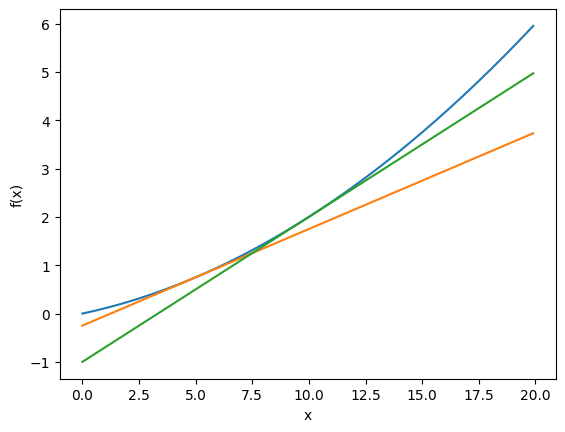

In [48]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf1 = tangent_line(function_1, 5)
tf2 = tangent_line(function_1, 10)

y1 = tf1(x)
y2 = tf2(x)

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

plt.show()


2、偏导数

假设函数为：
$$
f(x) = {X1^2 + X2^2}
$$    

偏导数数学表达式：
$$
\frac{\partial f}{\partial x1} = 2x1
$$
$$
\frac{\partial f}{\partial x2} = 2x2
$$


偏导数和单变量的导数一样，都是求某个地方的斜率，不过，偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为某个值。

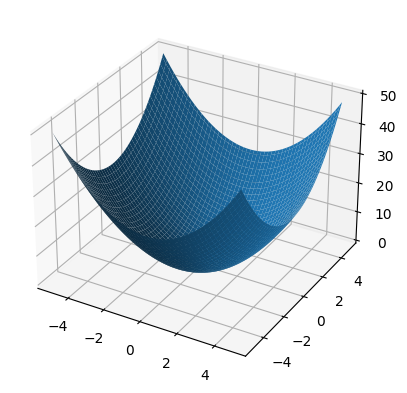

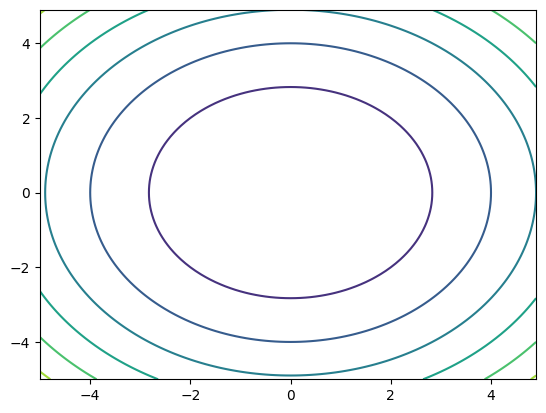

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def function_2(x1,x2):
    return x1**2 + x2**2
#函数图像
x1 = np.arange(-5.0,5.0,0.1)
x2 = np.arange(-5.0,5.0,0.1)
X1,X2 = np.meshgrid(x1,x2)
Y = function_2(X1,X2)
#绘制3D图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y)
plt.show()
#绘制等高线图
plt.contour(X1, X2, Y)
plt.show()


3、梯度

在偏导数中按照变量分别计算了x0 和 x1 的偏导数，现在希望一起计算x0 和 x1 的偏导数；
像以下公式这样由全部变量的偏导数汇总而成的向量称为梯度（Gradient）
$$
\frac{\partial f}{\partial x1} \frac{\partial f}{\partial x2}
$$

In [3]:
#参数f 为函数，x为numpy 数组，该函数时numpy 数组x的各个元素求数值微分
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同,所有元素都是0的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad

    #分别求点（3，4）（0，2）（3，0）的梯度
def function_2(x):
    return x[0]**2 + x[1]**2

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


像以上运行结果，可以计算(x0, x1)在各点处的梯度。上例中，点(3, 4)处的梯度是(6, 8)、点(0, 2)处的梯度是(0, 4)、点(3, 0)处的梯度是(6, 0)。这个梯度意味着什么呢？

梯度的方向指向函数值增加最快的方向。上例中，点(3, 4)处的梯度是(6, 8)，方向是从点(3, 4)向(9, 12)方向。也就是说，当(x0, x1)的值分别为(3, 4)时，函数值增加最快。



4、梯度法

机器学习的主要任务是在学习时寻找最优参数。同样地，神经网络也必须在学习时找到最优参数（权重和偏置）。这里所说的最优参数是指损失函数取最小值时的参数。但是，一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值。而通过巧妙地使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是梯度法。

梯度法是一种常用的优化方法，用于寻找函数的最小值。它的基本思想是：在函数上任意一点，沿着该点的梯度方向，函数值减少最快。因此，我们可以通过不断地沿着梯度方向移动，来逐步逼近函数的最小值。

梯度表示的是各点处的函数值减小最多的方向.因此无法保证梯度所指方向就是函数的最小值或者真正应该前进的方向。实际上在复杂函数中，梯度指示的方向基本上都不是函数值最小处。

函数的极小值、最小值以及被称为鞍点（saddle point）的地方，梯度为 0。极小值是局部最小值，也就是限定在某个范围内的最小值。鞍点是从某个方向上看是极大值，从另一个方向上看则是极小值的点。虽然梯度法是要寻找梯度为 0的地方，但是那个地方不一定就是最小值（也有可能是极小值或者鞍点）。此外，当函数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区，陷入被称为“学习高原”的无法前进的停滞期。

虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地减小函数的值。因此，在寻找函数的最小值（或者尽可能小的值）的位置的任务中，要以梯度的信息为线索，决定前进的方向。
此时梯度法就派上用场了。在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是梯度法（gradient method）。梯度法是解决机器学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。

梯度下降法：寻找最小值的梯度法
梯度上升法：寻找最大值的梯度法
但是通过反转损失函数的符号，求最小值的问题和求最大值的问题会变成相同的问题，因此“下降”还是“上升”的差异本质上并不重要。一般来说，神经网络（深度学习）中，梯度法主要是指梯度下降法。


梯度法的具体步骤如下：

1. 随机初始化一个点，例如(x0, x1)。

2. 计算该点的梯度，即该点的导数值。

3. 根据梯度的方向，更新点的位置。更新的公式为：

    x0= x0 - α * ∇f(x0)

    x1= x1 - α * ∇f(x1)

其中，α是学习率，决定了每次更新的步长,学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。

4. 重复步骤2和3，逐渐减小函数值。停止条件可以是达到最大迭代次数，或者梯度的范数小于一个阈值。

这里只展示了有两个变脸时的更新过程，但是即使增加变量的数量，也可以通过类似的式子（各个变量的偏导数）更新参数。

5. 返回最终的点，即最小值所在的位置。

梯度法的优点是简单、易于实现。缺点是可能收敛到局部最小值，而不是全局最小值。

学习率需要事先确定某个值，如0.001,0.0001等。

In [4]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2
    
init_x = np.array([-3.0, 4.0])    

print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))


[-6.11110793e-10  8.14814391e-10]


In [6]:
#学习率过大的例子
lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=lr, step_num=100))

#学习率过小的例子
lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=lr, step_num=100))


[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


结果证明，如果学习率过大的话，会发散成一个很大的值；学习率过小的话，基本上没怎么更新就结束了。

    像学习率这样的参数称为超参数。这是一种和神经网络的参数（权重和偏置）性质不同的参数。相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。
    一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利进行的设定。

神经网络的梯度

这里所说的梯度是指损失函数关于权重参数的梯度。梯度是一个向量，它的元素个数和权重的个数相同。梯度的方向指向损失函数增加最快的方向。梯度的大小表示了在该方向上损失函数变化最快的速率。

神经网络的学习是通过梯度下降法来实现的。梯度下降法的基本思想是：在当前位置，沿着梯度的反方向，移动一定距离，直到到达损失函数的最小值。梯度下降法的公式如下：

$$
w = w - \alpha \frac{\partial L}{\partial w}
$$

其中，$w$ 是权重参数，$\alpha$ 是学习率，$\frac{\partial L}{\partial w}$ 是损失函数 $L$ 关于权重 $w$ 的梯度。

$\frac{\partial L}{\partial w}$ 的元素由各个元素关于W的偏导数构成，表示W稍微变化时，损失函数L会发生多大变化，形状和W相同即：

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial w}
$$

神经网络的学习过程中，需要计算损失函数关于权重的梯度。梯度的计算需要使用反向传播算法。反向传播算法的基本思想是：从输出层开始，依次计算每个神经元的误差梯度，直到输入层。误差梯度的计算需要使用链式法则。

链式法则的公式如下：

$$
\frac{\partial z}{\partial w} = \frac{\partial z}{\partial a} \frac{\partial a}{\partial z} = \frac{\partial z}{\partial a} \sigma'(z)
$$

其中，$z$ 是加权输入，$a$ 是激活函数的输出，$\sigma(z)$ 是 sigmoid 函数，$\sigma'(z)$ 是 sigmoid 函数的导数。

误差梯度的计算如下：

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial w} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial z} = \frac{\partial L}{\partial z} \sigma'(z)
$$

其中，$L$ 是损失函数，$\frac{\partial L}{\partial z}$ 是损失函数关于加权输入 $z$ 的梯度。

神经网络的学习过程中，需要使用随机梯度下降法来更新权重参数。随机梯度下降法的基本思想是：每次从训练数据中随机抽取一个样本，计算损失函数关于该样本的梯度，更新权重参数。随机梯度下降法的公式如下：

$$
w = w - \alpha \frac{\partial L}{\partial w}
$$

其中，$w$ 是权重参数，$\alpha$ 是学习率，$\frac{\partial L}{\partial w}$ 是损失函数 $L$ 关于权重 $w$ 的梯度。

随机梯度下降法的优点是：

1. 计算速度快。每次更新权重参数只需要计算一个样本的梯度，而批量梯度下降法需要计算所有样本的梯度。
2. 可以在线学习。神经网络的学习过程中，训练数据是不断增加的。如果使用批量梯度下降法，那么每次更新权重参数都需要使用所有训练数据，这对于大规模数据集来说是不现实的。而随机梯度下降法可以在线学习，每次更新权重参数只需要使用一个样本。

随机梯度下降法的缺点是：

1. 不一定能收敛到全局最优解。
2. 波动大。由于每次更新权重参数只使用一个样本，所以权重参数的更新波动大。

为了解决随机梯度下降法的缺点，提出了动量梯度下降法和自适应学习率方法。动量梯度下降法的基本思想是：在每次更新权重参数时，考虑上一次的更新方向。自适应学习率方法的基本思想是：根据损失函数的变化情况，动态调整学习率。

In [ ]:
#一个简单神经网络为例，来实现求梯度的代码
import numpy as np

def softmax(x):
    if x.ndim == 2: #如果x是二维数组
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)   # 用高斯分布进行初始化

    def predict(self, x):
        return np.dot(x, self.W)
    #x 接收输入数据，t 接收正确解标签
    def loss(self, x, t):
        z = self.predict(x)
        #print("z的值为{}".format(z))
        y = softmax(z)
        #print("y的值为{}".format(y))
        loss = cross_entropy_error(y, t)

        return loss



"""simpleNet类只有一个实例变量,即权重参数W。这个权重参数的形状为(2,3),表示有2个输入,3个输出的神经网络。
有2个方法,一个是用于预测的predict,一个是用于计算损失的loss。x 接收输入数据,t 接收正确解标签
"""
net = simpleNet()
print(net.W)  #权重参数，随机生成

#设置神经元输入2个数据
x = np.array([0.6, 0.9])

p = net.predict(x)
print(p)   #输出3个数据，对应3个神经元的输出
print(np.argmax(p))  #最大值的索引，np.max(p)是输出最大值

#经过softmax函数后，输出变成了概率分布这里为y。
#计算损失
t = np.array([0, 0, 1])
print(net.loss(x, t))  

def f(W):
    return net.loss(x, t)
    
dW = numerical_gradient(f, net.W)  #numerical_gradient(f, x) 的参数f是函数，x是传给函数f的参数
print(dW)  #一个形状2x3的二维子数组


[[-0.50365199  2.55736857  1.86310184]
 [ 0.05757437  0.07041986 -0.60358368]]
[-0.25037426  1.59779901  0.57463579]
1
1.4398848149671493
[[ 0.06230452  0.39552232 -0.45782684]
 [ 0.09345678  0.59328348 -0.68674025]]


观察一下dW的内容，例如，会发现
$$
\frac{\partial L}{\partial w}
$$ 
中的L对于w11 的值大约是0.06，这表示如果将w11增加h，那么损失函数的值会增加0.06h。再如，L对于w23对应的值大约是−0.6，这表示如果将w23增加h，损失函数的值将减小0.6h。因此，从减
小损失函数值的观点来看，w23应向正方向更新，w11应向负方向更新。至于更新的程度，w23比w11的贡献要大。

上面代码可以将def f(W) 这个函数简写为
f=lambda W:net.loss(x,t)
dW=numerical_gradient(f,net.W)


求出神经网络的梯度后，接下来只需要根据梯度法，更新权重参数即可。

学习算法的实现：

前提：

    神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面4个步骤。

    1、（mini-batch）
    从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们的目标是减小mini-batch的损失函数的值。

    2、（计算梯度）
    为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减小最多的方向。

    3、（更新参数）
    将权重参数沿梯度方向进行微小更新。

    4、（重复）
    重复步骤1~3。

神经网络的学习按照上面4个步骤进行。这个方法通过梯度下降法更新参数，不过因为这里使用的数据是随机选择的mini batch数据，所以又称为随机梯度下降法（stochastic gradient descent）。“随机”指的是“随机选择的”的意思，因此，随机梯度下降法是“对随机选择的数据进行的梯度下降法”。深度学习的很多框架中，随机梯度下降法一般由一个名为SGD的函数来实现。SGD来源于随机梯度下降法的英文名称的首字母。下面，我们来实现手写数字识别的神经网络。这里以2层神经网络（隐藏层为1层的网络）为对象，使用MNIST数据集进行学习。

============== 见手写数字识别2 ===============

![image.png](./learn-images/loss.png)


经网络的学习中，必须确认是否能够正确识别训练数据以外的其他数据，即确认是否会发生过拟合。过拟合是指，虽然训练数据中的数字图像能被正确辨别，但是不在训练数据中的数字图像却无法被识别的现象。神经网络学习的最初目标是掌握泛化能力，因此，要评价神经网络的泛化能力，就必须使用不包含在训练数据中的数据。下面的代码在进行学习的过程中，会定期地对训练数据和测试数据记录识别精度。这里，每经过一个epoch，我们都会记录下训练数据和测试数据的识别精度

epoch是一个单位。一个 epoch表示学习中所有训练数据均被使用过一次时的更新次数。比如，对于 10000笔训练数据，用大小为 100笔数据的mini-batch进行学习时，重复随机梯度下降法 100次，所有的训练数据就都被“看过”了。此时，100次就是一个 epoch。

总结
为了能顺利进行神经网络的学习，导入损失函数这个指标，以这个指标为基准，找出使它的值达到最小的权重参数，这就是神经网络学习的目标，为了找到尽可能小的损失函数值，我们介绍了使用函数斜率的梯度法。
